In [93]:
sys.path.append('../src')

import sys
import time
import numpy
import random as rnd
from quick_find import QuickFind

def gendata(n):
    return [(rnd.randrange(0, n), rnd.randrange(0, n)) for _ in range(n)]

trials = [x for x in numpy.linspace(10, 2000, 20, dtype=int)]
results = []

for t in trials:
    network = QuickFind(t)
    data = gendata(t)
    begin = time.time()
    for p, q in data:
        network.union(p, q);
    end = time.time()
    results.append((end - begin))

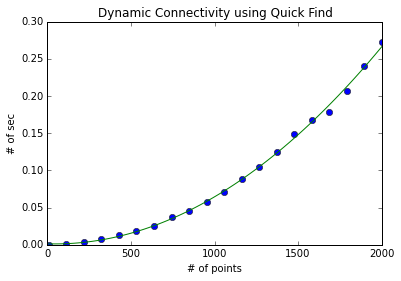

In [99]:
%matplotlib inline
from matplotlib import pyplot as plt

fit = numpy.polyfit(trials, results, 2) 
polynomial = numpy.poly1d(fit)
xx = numpy.linspace(0, 2000, 100)

plt.plot(trials, results, 'o', xx, polynomial(xx), '-g')
plt.title('Dynamic Connectivity using Quick Find')
plt.xlabel('# of points')
plt.ylabel('# of sec')
plt.show()